# Geographic and Projected Coordinate Systems

Uses data from NaturalEarth

[Downloads](https://www.naturalearthdata.com/downloads)

In [1]:
import geopandas as gpd 
import matplotlib.pyplot as plt

In [4]:
capitals = gpd.read_file('../data/naturalearth/ne_110m_populated_places.shp')
grat = gpd.read_file('../data/Graticule/ne_110m_graticules_10.shp')

In [14]:
capitals.FEATURECLA.unique()

array(['Admin-0 capital', 'Admin-0 capital alt', 'Populated place',
       'Admin-1 capital', 'Admin-1 region capital',
       'Admin-0 region capital'], dtype=object)

In [15]:
capitals = capitals[capitals.FEATURECLA == 'Admin-0 capital']
capitals.iloc[1]

SCALERANK                                 7
NATSCALE                                 20
LABELRANK                                 0
FEATURECLA                  Admin-0 capital
NAME                             San Marino
                          ...              
FCLASS_SE                              None
FCLASS_BD                              None
FCLASS_UA                              None
FCLASS_TLC                             None
geometry      POINT (12.4417702 43.9360958)
Name: 1, Length: 138, dtype: object

In [16]:
capitals.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
capitals.crs == grat.crs

True

In [18]:
world = gpd.read_file('../data/naturalearth/ne_110m_land.shp')

In [19]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

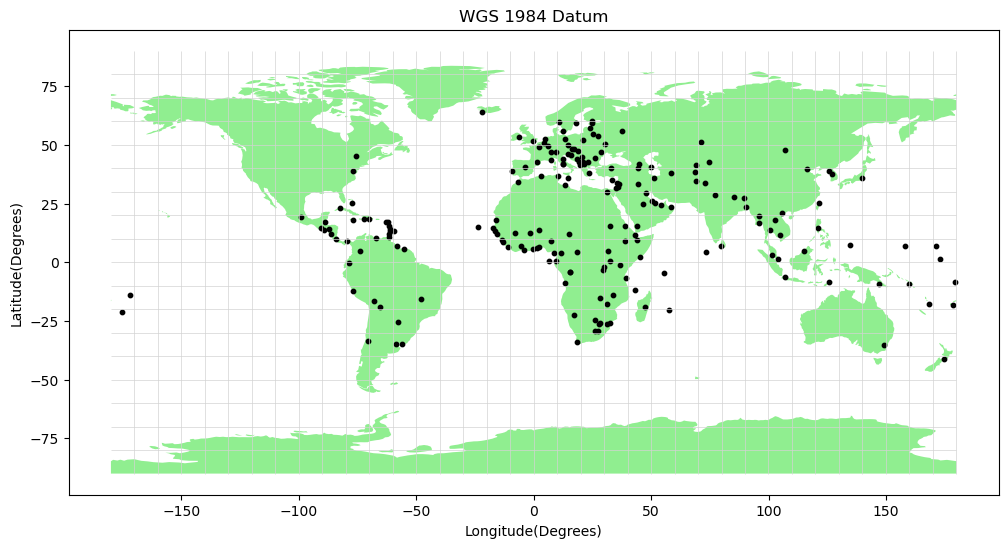

In [28]:
f, ax = plt.subplots(figsize=(12,10))
world.plot(ax=ax, color='lightgreen')
capitals.plot(ax=ax, c='k', markersize=10, marker='o')
grat.plot(ax=ax, color='lightgrey', lw=0.5)
ax.set(xlabel="Longitude(Degrees)",
    ylabel="Latitude(Degrees)",
    title="WGS 1984 Datum");

# Reprojecting

>Azimuthal Equidistant projection

In [29]:
world_ae = world.to_crs("ESRI:54032")
grat_ae = grat.to_crs("ESRI:54032")

In [30]:
world_ae.crs

<Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Azimuthal_Equidistant
- method: Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
def plot_map_layers(gdfs, name, unit): 
    f, ax = plt.subplots(figsize=(12,10))
    gdfs[0].plot(ax=ax, color="darkgrey")
    gdfs[1].plot(ax=ax, color='k', markersize=10, marker='o')
    gdfs[2].plot(ax=ax, color='lightgrey', linewidth=0.5)
    ax.set(
        xlabel='X Coordinate - ' + unit,
        ylabel='Y Coordinate - ' + unit,
        title=name
    )
    plt.show()

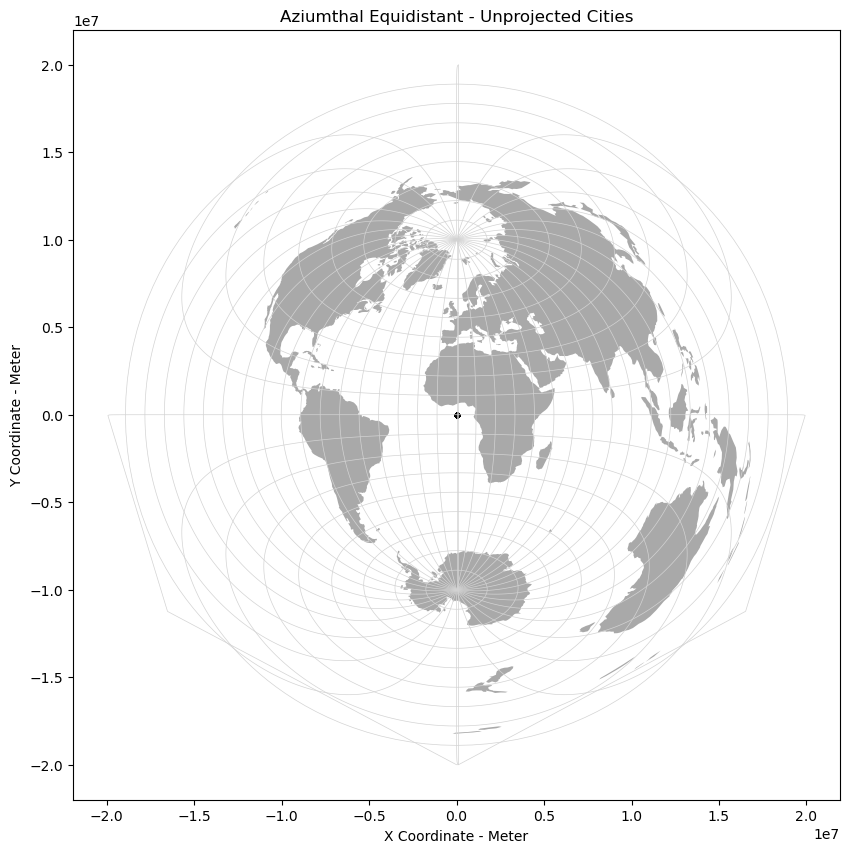

In [37]:
plot_map_layers([world_ae, capitals, grat_ae], 
               "Aziumthal Equidistant - Unprojected Cities", 
               "Meter")

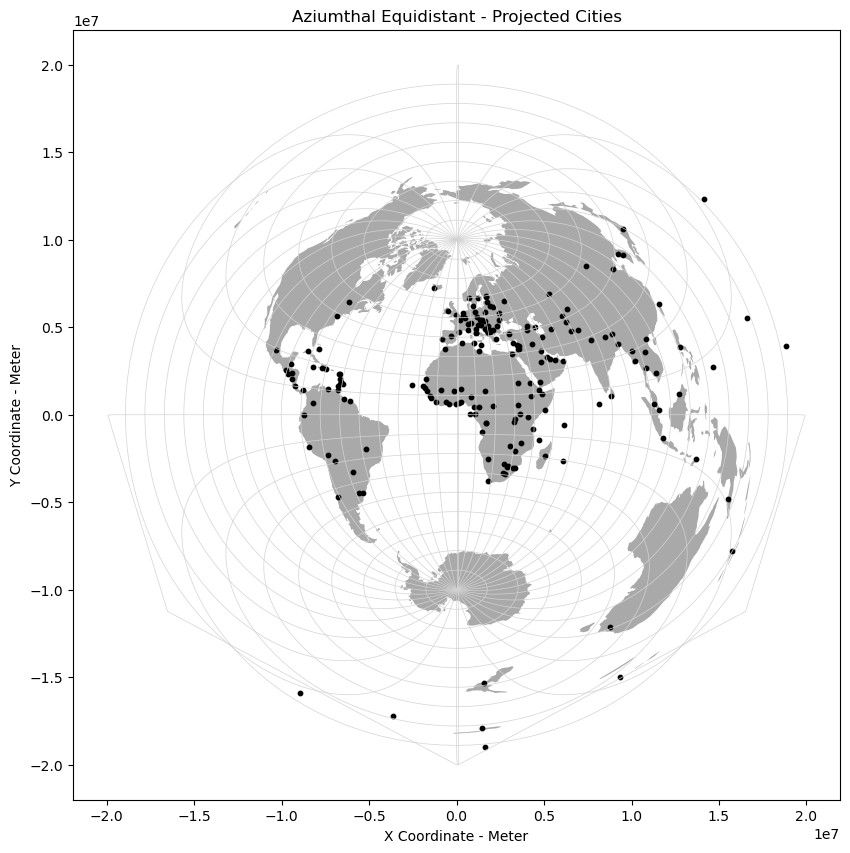

In [38]:
capitals_ae = capitals.to_crs("ESRI:54032")
plot_map_layers([world_ae, capitals_ae, grat_ae], 
               "Aziumthal Equidistant - Projected Cities", 
               "Meter"
               )